# G-Dwarf Problem

This concerns the prediction of the ''closed-box'' model for the number of metal-poor disk stars and how it doesn't match the observations for the solar neighborhood. The model predicts that about one half of the stars in the local disk should have less than 1/4 solar metallicity, but observations found that only ~20% of stars have < 25% solar abundance of iron (this discrepancy was first discovered in G-dwarf stars, hence the name). This discrepancy could be caused by the fact that the ''closed-box'' model is overly simplified and that its assumptions are not quite correct. For example, one possible solution would be that the gas from which the disk formed was pre-enriched with metals produced by the earliest stars before it arrived in the solar neighborhood (as opposed to the ''closed-box'' assumption that heavy elements were originally absent from the gas). Another possible solution  could be incomplete mixing: star formation could have started before the gas fully assembled, and thus only a small amount of gas would have been enriched by the earliest stars (as opposed to the complete mixing assumption of ''closed-box''). This would prevent the metal abundance from increasing as fast as ''closed-box'' predictions.  

# UV Luminosity Functions

In [1]:
import numpy as np
import emcee

import matplotlib.pyplot as plt
import corner

In [29]:
### for z~4
mags4 = np.array([-22.69, -22.19, -21.69, -21.19, -20.69, -20.19, -19.69, -19.19,
       -18.69, -18.19, -17.69, -16.94, -15.94])
phik4 = np.array([ 0.000003,  0.000015,  0.000134, 0.000393, 0.000678,  0.001696 ,  0.002475,  0.002984, 
                 0.005352,  0.006865, 0.010473, 0.024580, 0.025080])
phik4_err = np.array([0.000004, 0.000009, 0.000023, 0.000040, 0.000063, 0.000113, 0.000185, 0.000255, 
                    0.000446, 0.001043, 0.002229, 0.003500, 0.007860])

### for z~6
mags6 = np.array([-22.52, -22.02, -21.52, -21.02, -20.52, -20.02, -19.52, -18.77,
       -17.77, -16.77])
phik6 = np.array([0.000002,  0.000015,  0.000053, 0.000176, 0.000320, 0.000698,  0.001246, 0.001900, 
                0.006680, 0.013640])
phik6_err = np.array([0.000002, 0.000006, 0.000012, 0.000025, 0.000041, 0.000083, 0.000137, 0.000320,
                    0.001380, 0.004200])

### for z~8
mags8 = np.array([ -21.87, -21.37, -20.87, -20.37, -19.87, -19.37, -18.62, -17.62]) #-22.87, -22.37
phik8 = np.array([0.000005,  0.000013, 0.000058, 0.000060,  0.000331,  0.000533, 
                  0.001060,  0.002740]) #3e-9, 1e-7 
phik8_err = np.array([0.000003, 0.000005, 0.000015, 0.000026, 0.000104, 0.000226, 
                      0.000340, 0.001040]) #0.000002, 0.000002

In [39]:
### probabilites here
def lnlike(theta, M, phi, phierr):
    logphistar, Mstar, alpha = theta[0], theta[1], theta[2]
    x = 10**(-0.4*(M-Mstar))
    model = (np.log(10)/2.5)*(10**logphistar)*x**(alpha+1)*np.exp(-x)
    return -0.5*np.sum((phi-model)**2/(phierr**2) + np.log(2*np.pi*phierr**2))

# def lnprior(theta):
#     logphistar, Mstar, alpha = theta[0], theta[1], theta[2]
#     if -25. < Mstar < -15. and -5. < logphistar < -2. and -3.5 < alpha < -1.:
#         return 0
#     return -np.inf

def lnprior4(theta):
    logphistar, Mstar, alpha = theta[0], theta[1], theta[2]
    sums = 0
    sums += -0.5*((Mstar - (-20.88))**2/(2*0.08)**2 + np.log(2*np.pi*(2*0.08)**2))
    sums += -0.5*((alpha - (-1.64))**2/(2*0.04)**2 + np.log(2*np.pi*(2*0.04)**2))
    sums += -0.5*((logphistar - (-2.71))**2/(2*0.07)**2 + np.log(2*np.pi*(2*0.07)**2))
    return sums

def lnprior6(theta):
    logphistar, Mstar, alpha = theta[0], theta[1], theta[2]
    sums = 0
    sums += -0.5*((Mstar - (-20.94))**2/(2*0.2)**2 + np.log(2*np.pi*(2*0.2)**2))
    sums += -0.5*((alpha - (-1.87))**2/(2*0.10)**2 + np.log(2*np.pi*(2*0.10)**2))
    sums += -0.5*((logphistar - (-3.26))**2/(2*0.19)**2 + np.log(2*np.pi*(2*0.19)**2))
    return sums

# try gaussian prior
def lnprior8(theta):
    logphistar, Mstar, alpha = theta[0], theta[1], theta[2]
    sums = 0
    sums += -0.5*((Mstar - (-20.63))**2/(2*0.36)**2 + np.log(2*np.pi*(2*0.36)**2))
    sums += -0.5*((alpha - (-2.02))**2/(2*0.23)**2 + np.log(2*np.pi*(2*0.23)**2))
    sums += -0.5*((logphistar - (-3.68))**2/(2*0.48)**2 + np.log(2*np.pi*(2*0.48)**2))
    return sums
    

def lnprob(theta, lnprior, M, phi, phierr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, M, phi, phierr)

# z~4

In [40]:
### emcee here
ndim, nwalkers = 3, 200
pos = [np.array([-2.5,-21.,-1.5])+1e-4*np.random.randn(ndim) for i in range(nwalkers)]
emcee_sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(lnprior4, mags4, phik4, phik4_err))
pos1, prob, state = emcee_sampler.run_mcmc(pos, 2000)
emcee_sampler.reset()
emcee_sampler.run_mcmc(pos1, 5000, rstate0=state);

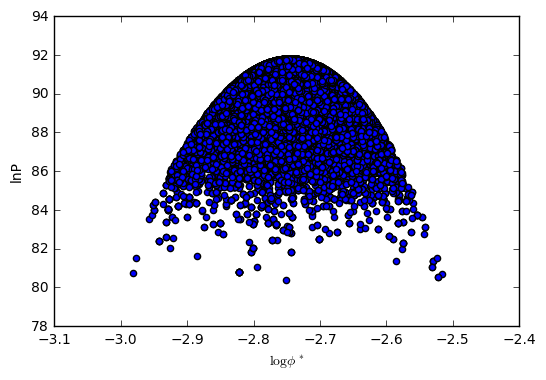

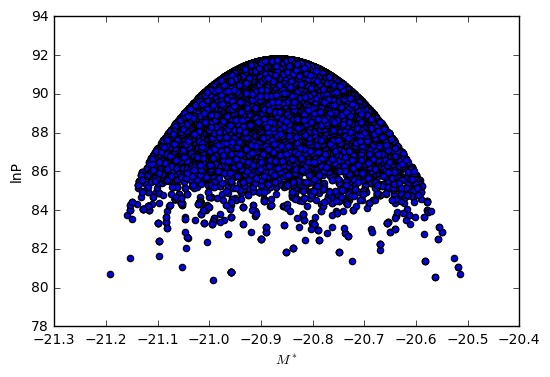

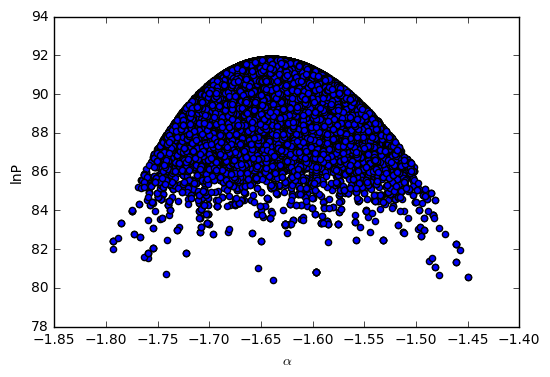

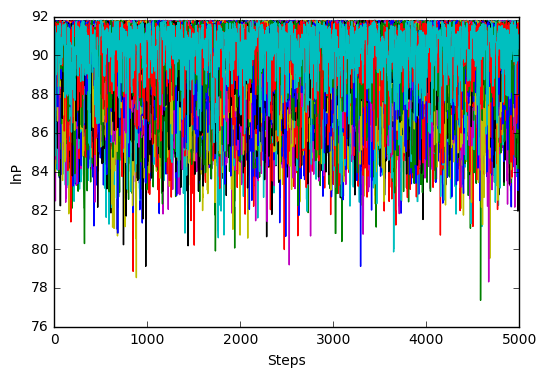

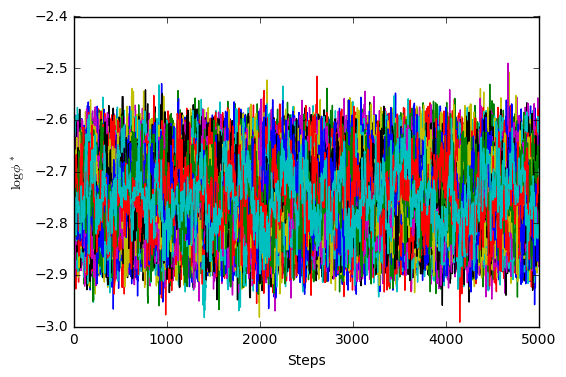

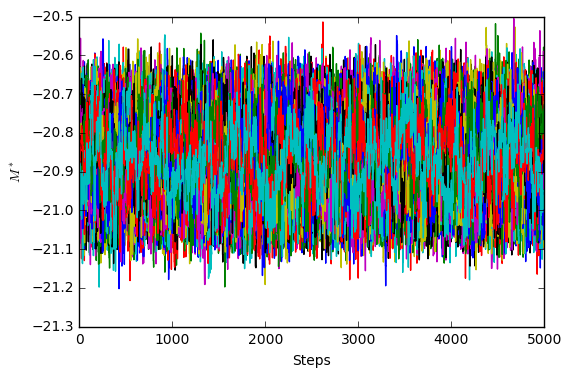

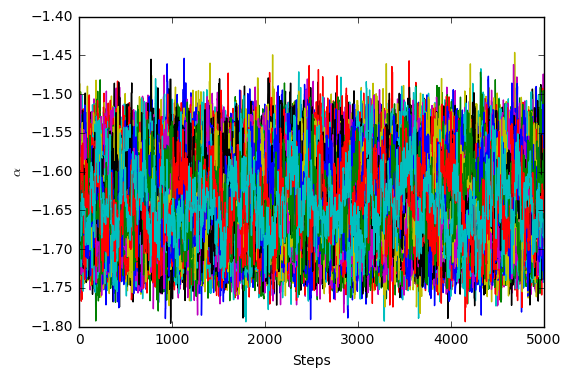

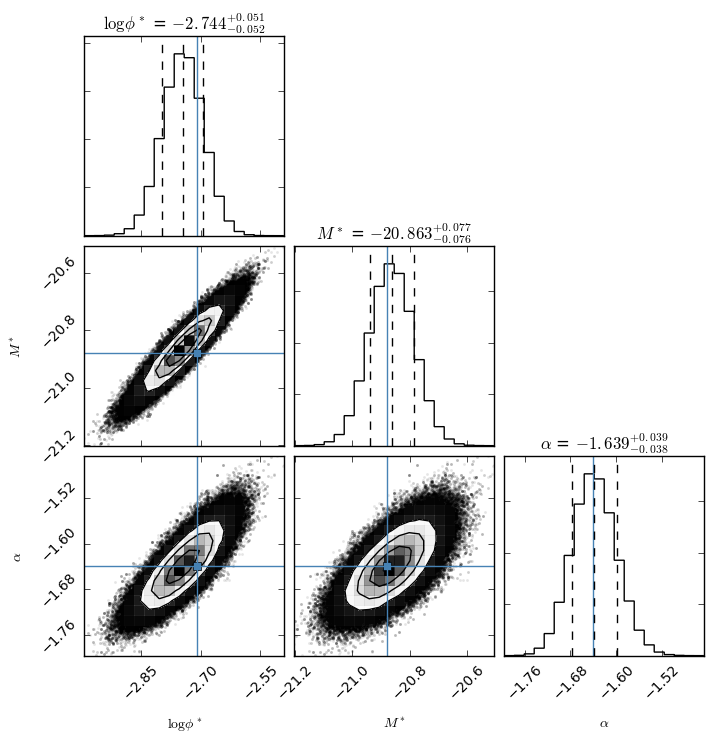

In [41]:
[plt.scatter(emcee_sampler.chain[i,:,0], emcee_sampler.lnprobability[i,:]) for i in range(30)]
plt.xlabel(r'${\rm \log \phi^*}$')
plt.ylabel('lnP')
plt.show()

[plt.scatter(emcee_sampler.chain[i,:,1], emcee_sampler.lnprobability[i,:]) for i in range(30)]
plt.xlabel(r'$M^*$')
plt.ylabel('lnP')
plt.show()

[plt.scatter(emcee_sampler.chain[i,:,2], emcee_sampler.lnprobability[i,:]) for i in range(30)]
plt.xlabel(r'$\alpha$')
plt.ylabel('lnP')
plt.show()

[plt.plot(emcee_sampler.lnprobability[i,:]) for i in range(nwalkers)]
plt.xlabel('Steps')
plt.ylabel('lnP')
plt.show()

[plt.plot(emcee_sampler.chain[i,:,0]) for i in range(nwalkers)]
plt.xlabel('Steps')
plt.ylabel(r'${\rm \log \phi^*}$')
plt.show()

[plt.plot(emcee_sampler.chain[i,:,1]) for i in range(nwalkers)]
plt.xlabel('Steps')
plt.ylabel(r'$M^*$')
plt.show()

[plt.plot(emcee_sampler.chain[i,:,2]) for i in range(nwalkers)]
plt.xlabel('Steps')
plt.ylabel(r'$\alpha$')
plt.show()

emcee_samples = emcee_sampler.chain[:,:, :].reshape((-1, ndim))
fig = corner.corner(emcee_samples, labels=[r"${\rm \log \phi^*}$", r"$M^*$", r"$\alpha$"], quantiles=[0.16, 0.5, 0.84], \
                    show_titles=True, title_fmt='.3f', truths=[-2.71, -20.88, -1.64])
plt.show(fig)

In [42]:
### save for contour comparison 
p4 = emcee_sampler.flatchain[:,0]
m4 = emcee_sampler.flatchain[:,1]
a4 = emcee_sampler.flatchain[:,2]

# z~6

In [43]:
### emcee here
ndim, nwalkers = 3, 200
pos = [np.array([-3.,-21.,-1.5])+1e-4*np.random.randn(ndim) for i in range(nwalkers)]
emcee_sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(lnprior6, mags6, phik6, phik6_err))
pos1, prob, state = emcee_sampler.run_mcmc(pos, 2000)
emcee_sampler.reset()
emcee_sampler.run_mcmc(pos1, 5000, rstate0=state);

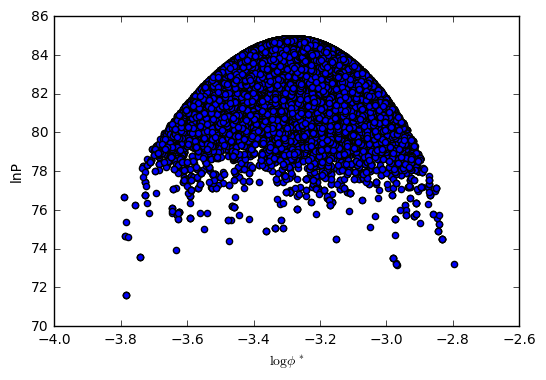

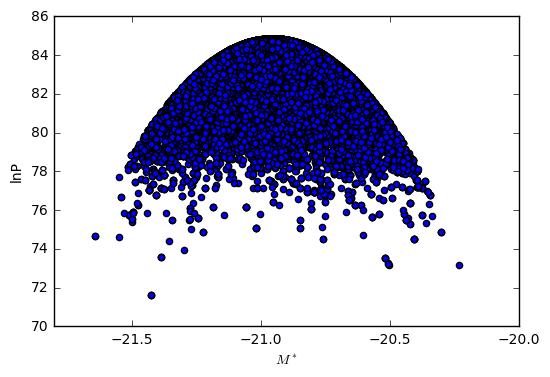

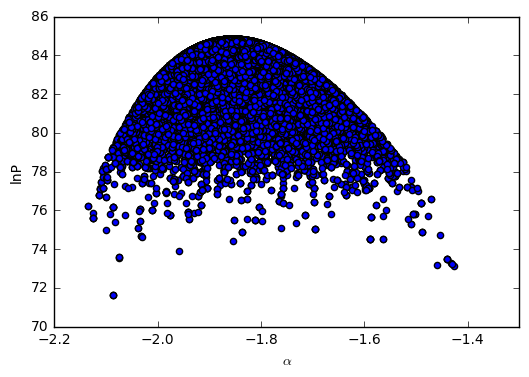

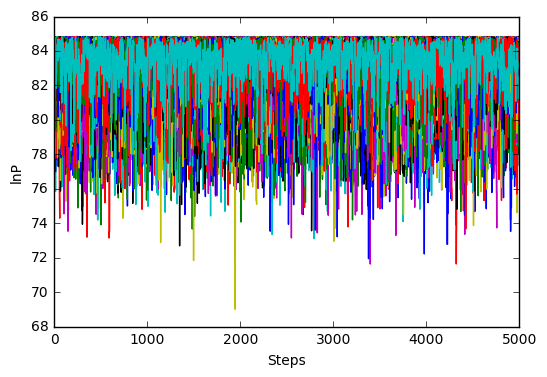

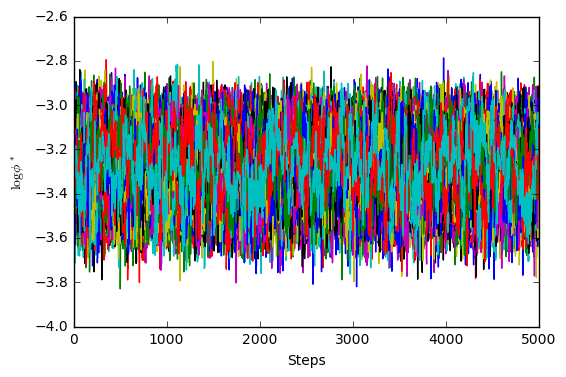

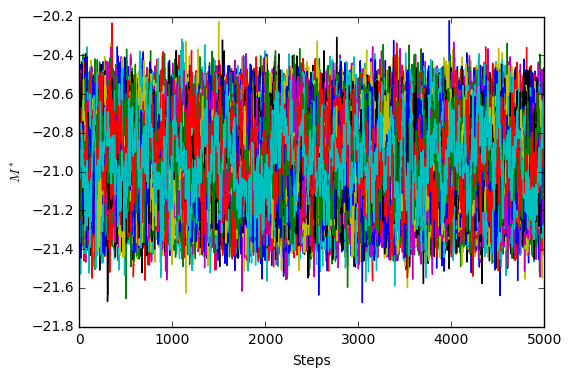

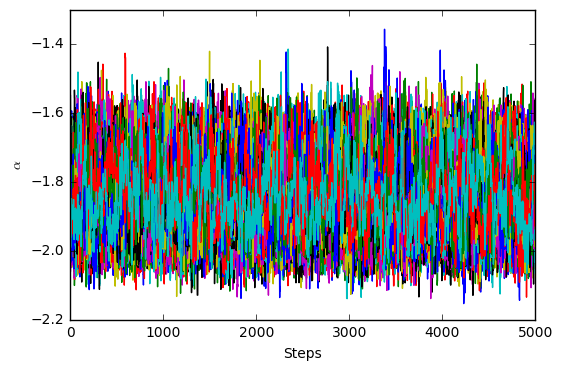

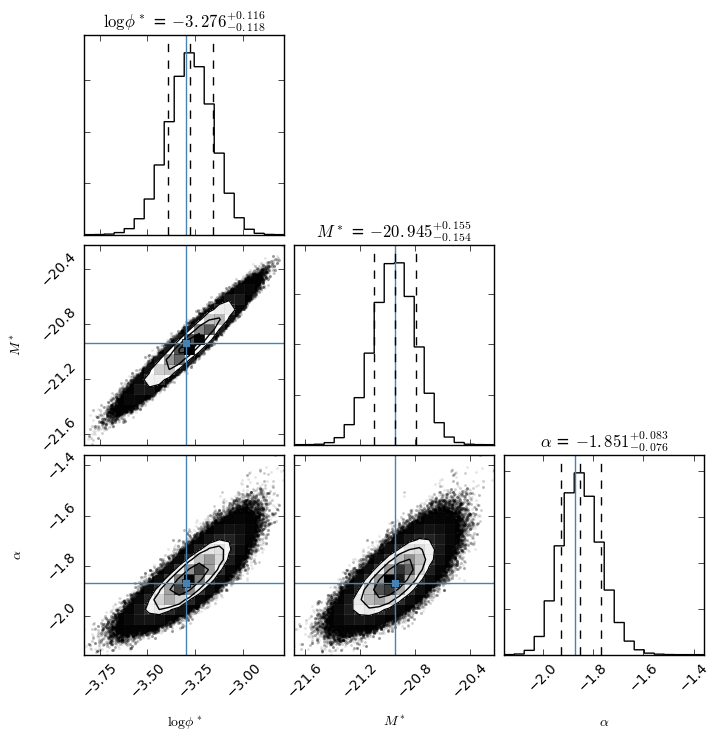

In [44]:
[plt.scatter(emcee_sampler.chain[i,:,0], emcee_sampler.lnprobability[i,:]) for i in range(30)]
plt.xlabel(r'${\rm \log \phi^*}$')
plt.ylabel('lnP')
plt.show()

[plt.scatter(emcee_sampler.chain[i,:,1], emcee_sampler.lnprobability[i,:]) for i in range(30)]
plt.xlabel(r'$M^*$')
plt.ylabel('lnP')
plt.show()

[plt.scatter(emcee_sampler.chain[i,:,2], emcee_sampler.lnprobability[i,:]) for i in range(30)]
plt.xlabel(r'$\alpha$')
plt.ylabel('lnP')
plt.show()

[plt.plot(emcee_sampler.lnprobability[i,:]) for i in range(nwalkers)]
plt.xlabel('Steps')
plt.ylabel('lnP')
plt.show()

[plt.plot(emcee_sampler.chain[i,:,0]) for i in range(nwalkers)]
plt.xlabel('Steps')
plt.ylabel(r'${\rm \log \phi^*}$')
plt.show()

[plt.plot(emcee_sampler.chain[i,:,1]) for i in range(nwalkers)]
plt.xlabel('Steps')
plt.ylabel(r'$M^*$')
plt.show()

[plt.plot(emcee_sampler.chain[i,:,2]) for i in range(nwalkers)]
plt.xlabel('Steps')
plt.ylabel(r'$\alpha$')
plt.show()

emcee_samples = emcee_sampler.chain[:,:, :].reshape((-1, ndim))
fig = corner.corner(emcee_samples, labels=[r"${\rm \log \phi^*}$", r"$M^*$", r"$\alpha$"], quantiles=[0.16, 0.5, 0.84], \
                    show_titles=True, title_fmt='.3f', truths=[-3.30, -20.94, -1.87])
plt.show(fig)

In [45]:
### save for contours plot
p6 = emcee_sampler.flatchain[:,0]
m6 = emcee_sampler.flatchain[:,1]
a6 = emcee_sampler.flatchain[:,2]

# z~8

In [46]:
### emcee here
ndim, nwalkers = 3, 200
pos = [np.array([-3.7,-20.6,-2.])+1e-4*np.random.randn(ndim) for i in range(nwalkers)]
emcee_sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(lnprior8, mags8, phik8, phik8_err))
pos1, prob, state = emcee_sampler.run_mcmc(pos, 2000)
emcee_sampler.reset()
emcee_sampler.run_mcmc(pos1, 5000, rstate0=state);

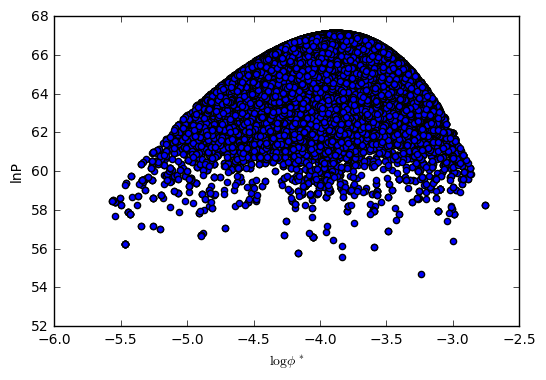

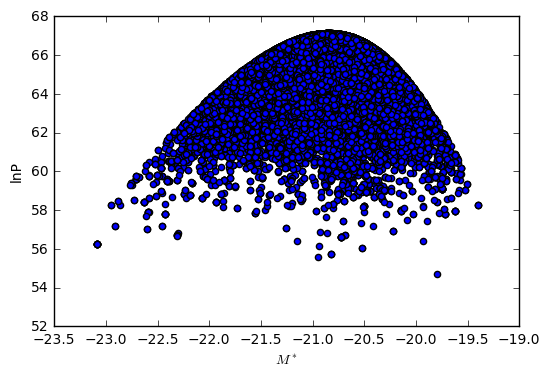

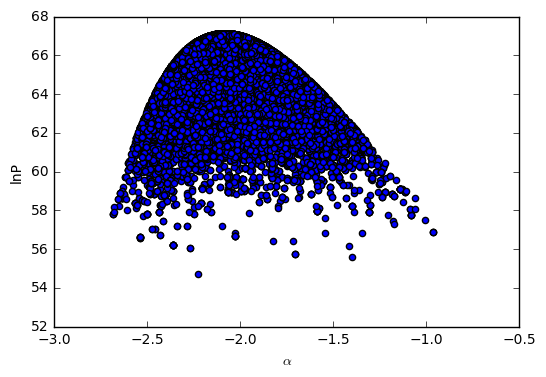

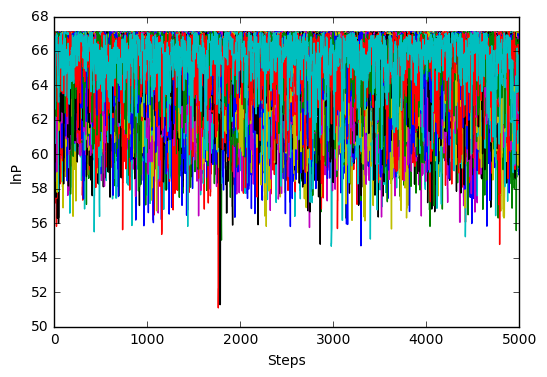

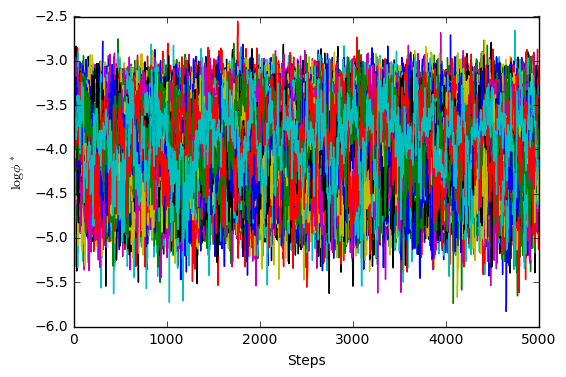

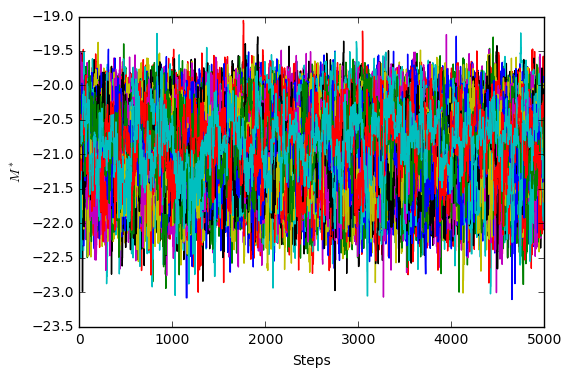

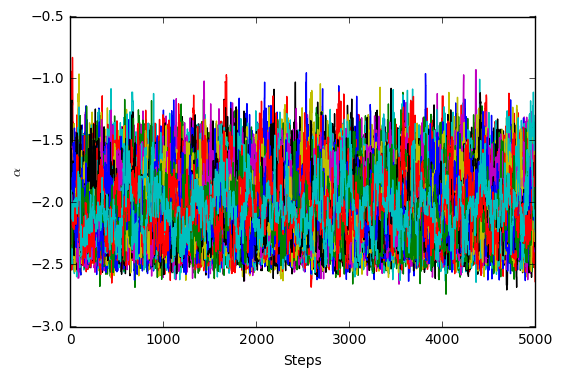

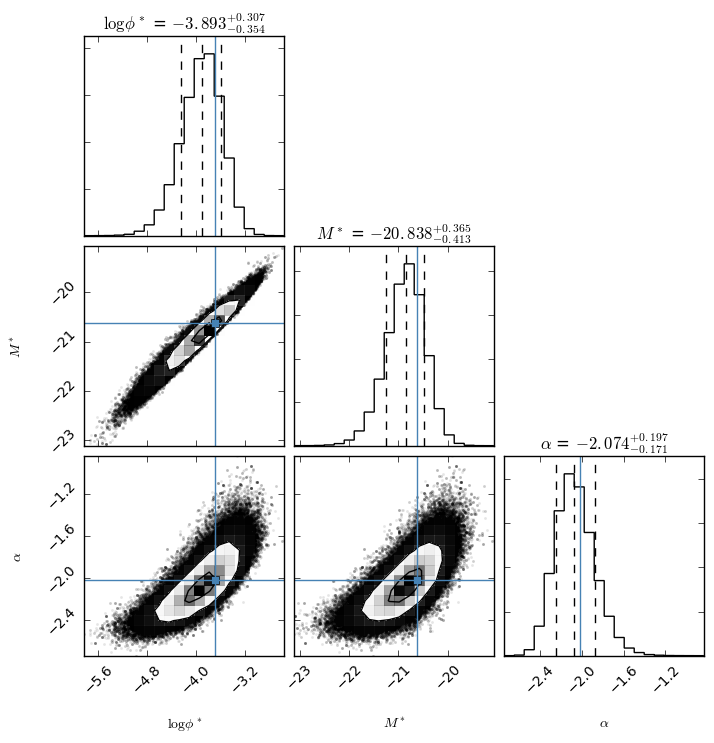

In [47]:
[plt.scatter(emcee_sampler.chain[i,:,0], emcee_sampler.lnprobability[i,:]) for i in range(30)]
plt.xlabel(r'${\rm \log \phi^*}$')
plt.ylabel('lnP')
plt.show()

[plt.scatter(emcee_sampler.chain[i,:,1], emcee_sampler.lnprobability[i,:]) for i in range(30)]
plt.xlabel(r'$M^*$')
plt.ylabel('lnP')
plt.show()

[plt.scatter(emcee_sampler.chain[i,:,2], emcee_sampler.lnprobability[i,:]) for i in range(30)]
plt.xlabel(r'$\alpha$')
plt.ylabel('lnP')
plt.show()

[plt.plot(emcee_sampler.lnprobability[i,:]) for i in range(nwalkers)]
plt.xlabel('Steps')
plt.ylabel('lnP')
plt.show()

[plt.plot(emcee_sampler.chain[i,:,0]) for i in range(nwalkers)]
plt.xlabel('Steps')
plt.ylabel(r'${\rm \log \phi^*}$')
plt.show()

[plt.plot(emcee_sampler.chain[i,:,1]) for i in range(nwalkers)]
plt.xlabel('Steps')
plt.ylabel(r'$M^*$')
plt.show()

[plt.plot(emcee_sampler.chain[i,:,2]) for i in range(nwalkers)]
plt.xlabel('Steps')
plt.ylabel(r'$\alpha$')
plt.show()

emcee_samples = emcee_sampler.chain[:,:, :].reshape((-1, ndim))
fig = corner.corner(emcee_samples, labels=[r"${\rm \log \phi^*}$", r"$M^*$", r"$\alpha$"], quantiles=[0.16, 0.5, 0.84], \
                    show_titles=True, title_fmt='.3f', truths=[-3.68, -20.63, -2.02], \
                    levels=(1.0 - np.exp(-0.5 * np.array([1., 2.]) ** 2)))
plt.show(fig)

In [48]:
### save for contours plot
p8 = emcee_sampler.flatchain[:,0]
m8 = emcee_sampler.flatchain[:,1]
a8 = emcee_sampler.flatchain[:,2]

In [49]:
levels = 1.0 - np.exp(-0.5 * np.array([1., 2.]) ** 2)
#print levels

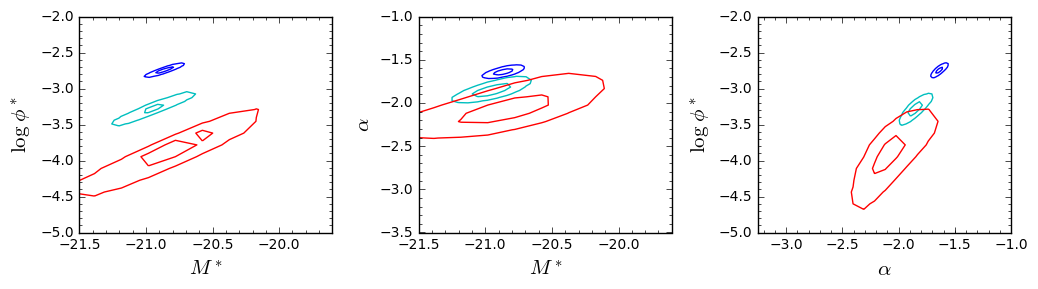

In [53]:
### similar to Figure 7 of Bouwens et al
fig, axarr = plt.subplots(1,3, figsize=(3.5*3,3))
corner.hist2d(m4,p4, levels=levels,plot_datapoints=False, plot_density=False, ax=axarr[0], \
             contour_kwargs={'colors':'b'})
corner.hist2d(m6,p6, levels=levels,plot_datapoints=False, plot_density=False, ax=axarr[0], \
             contour_kwargs={'colors':'c'})
corner.hist2d(m8,p8, levels=levels,plot_datapoints=False, plot_density=False, ax=axarr[0], \
             contour_kwargs={'colors':'r'})
corner.hist2d(m4,a4, levels=levels,plot_datapoints=False, plot_density=False, ax=axarr[1], \
             contour_kwargs={'colors':'b'})
corner.hist2d(m6,a6, levels=levels,plot_datapoints=False, plot_density=False, ax=axarr[1], \
             contour_kwargs={'colors':'c'})
corner.hist2d(m8,a8, levels=levels,plot_datapoints=False, plot_density=False, ax=axarr[1], \
             contour_kwargs={'colors':'r'})
corner.hist2d(a4,p4, levels=levels,plot_datapoints=False, plot_density=False, ax=axarr[2], \
             contour_kwargs={'colors':'b'})
corner.hist2d(a6,p6, levels=levels,plot_datapoints=False, plot_density=False, ax=axarr[2], \
             contour_kwargs={'colors':'c'})
corner.hist2d(a8,p8, levels=levels,plot_datapoints=False, plot_density=False, ax=axarr[2], \
             contour_kwargs={'colors':'r'})
axarr[0].set_ylim([-5,-2])
axarr[0].set_xlim([-21.5,-19.6])
axarr[0].set_xlabel(r'$M^*$', fontsize=15)
axarr[0].set_ylabel(r'${\rm \log \; \phi^*}$', fontsize=15)
axarr[0].minorticks_on()
axarr[1].set_ylim([-3.5,-1])
axarr[1].set_xlim([-21.5,-19.6])
axarr[1].set_xlabel(r'$M^*$', fontsize=15)
axarr[1].set_ylabel(r'$\alpha$', fontsize=15)
axarr[1].minorticks_on()
axarr[2].set_ylim([-5,-2])
axarr[2].set_xlim([-3.25,-1])
axarr[2].set_xlabel(r'$\alpha$', fontsize=15)
axarr[2].set_ylabel(r'${\rm \log \; \phi^*}$', fontsize=15)
axarr[2].minorticks_on()
plt.tight_layout()
plt.show()

The `emcee` results generally agree with the Bouwens et al results. They show an evolution of $\alpha$ and $\phi^*$ with redshift. The parameter values derived by Bouwens et al are within 1-$\sigma$ of the `emcee` results. The joint distributions also look similar to Bouwens et al.  
Possible differences could be due to the different methodologies used to derive the best-fit Schechter parameters (Bouwens et al use STY79).